# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of a data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# NULL values check
print('No of null values:\n\n',df.isnull().sum().sort_values(ascending = False))
print('\n\nPercentage of null values:\n\n',(df.isnull().mean()*100).sort_values(ascending = False))

No of null values:

 CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


Percentage of null values:

 CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64


In [7]:
# Convert data types
df = df.convert_dtypes()

In [8]:
# Unique vals
print('# Unique values :\n', df.nunique())

# Unique values :
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [9]:
# storing unknown customers in another dataframe for seperate analysis
null_customers = df[df['CustomerID'].isna()]
null_customers['CustomerID'].fillna(0,inplace = True)

In [10]:
# dropping null
df.dropna(subset = ['Description'],inplace = True)


# data without unknown customers
cleaned_df = df.dropna(subset = 'CustomerID')

# data with unknown customers represented with 0
df['CustomerID'].fillna(0, inplace = True)

In [11]:
# Duplicates check
df.duplicated().sum()

5268

In [12]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True, drop = True)

cleaned_df.drop_duplicates(inplace = True)
cleaned_df.reset_index(drop = True, inplace = True)

null_customers.drop_duplicates(inplace = True)
null_customers.reset_index(inplace = True, drop = True)

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [14]:
# basic stats
df.describe()

,Quantity,UnitPrice,CustomerID
count,535187.0,535187.0,535187.0
mean,9.671593,4.645242,11466.973804
std,219.059056,97.36481,6778.037985
min,-80995.0,-11062.06,0.0
25%,1.0,1.25,12348.0
50%,3.0,2.08,14360.0
75%,10.0,4.13,16242.0
max,80995.0,38970.0,18287.0


In [15]:
# extracting dates
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day

cleaned_df['Year'] = pd.DatetimeIndex(cleaned_df['InvoiceDate']).year
cleaned_df['Month'] = pd.DatetimeIndex(cleaned_df['InvoiceDate']).month

In [16]:
# As our data is from dec-2010 to dec-2011 we will need Year along with Month
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
cleaned_df['YearMonth'] = cleaned_df['Year'].astype(str) + '-' + cleaned_df['Month'].astype(str).str.zfill(2)

In [17]:
# convert to datetime format
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
cleaned_df['YearMonth'] = pd.to_datetime(cleaned_df['YearMonth'], format='%Y-%m')

In [18]:
# calculate revenue
df['Revenue'] = df['Quantity']*df['UnitPrice']
cleaned_df['Revenue'] = cleaned_df['Quantity']*cleaned_df['UnitPrice']
null_customers['Revenue'] = null_customers['Quantity']*null_customers['UnitPrice']

## Exploratory Data Analysis

In [19]:
# revenue by month
rev_by_month = df.groupby('YearMonth')['Revenue'].sum().reset_index()

# Convert 'YearMonth' to datetime format for easier manipulation
# rev_by_month['YearMonth'] = pd.to_datetime(rev_by_month['YearMonth'], format='%b-%Y')

# Sort the DataFrame by 'YearMonth'
rev_by_month = rev_by_month.sort_values(by='YearMonth')

In [20]:
rev_by_month

,YearMonth,Revenue
0,2010-12-01,746723.61
1,2011-01-01,558448.56
2,2011-02-01,497026.41
3,2011-03-01,682013.98
4,2011-04-01,492367.841
5,2011-05-01,722094.1
6,2011-06-01,689977.23
7,2011-07-01,680156.991
8,2011-08-01,681386.46
9,2011-09-01,1017596.682


Total Revenue: $9726006.95


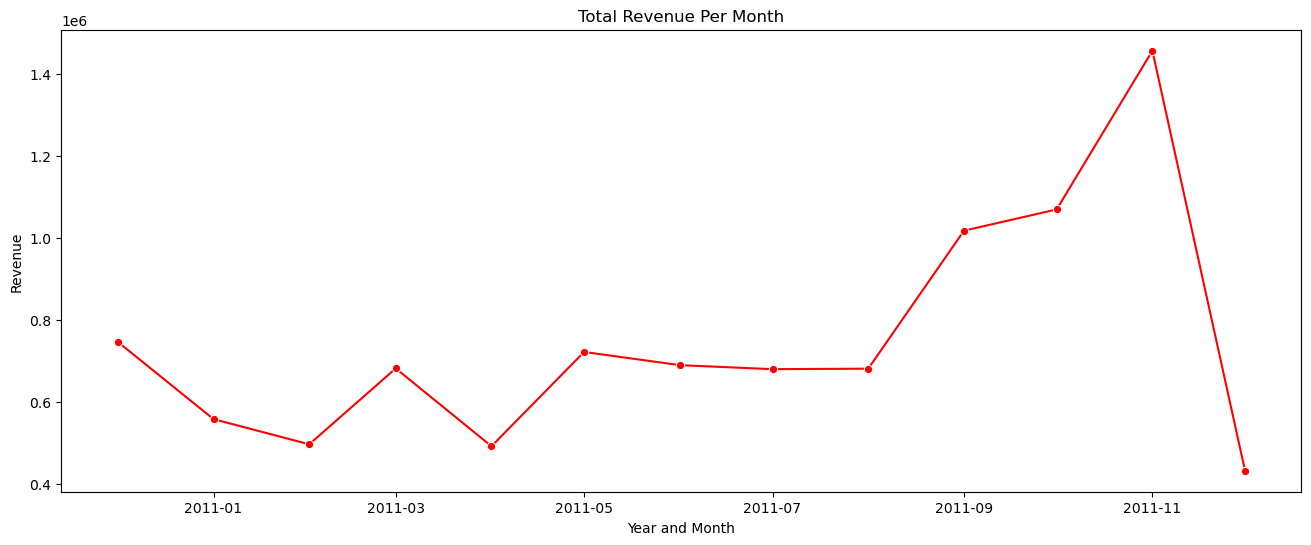

In [21]:
print(f'Total Revenue: ${df["Revenue"].sum():.2f}')
# Revenue per month plot
plt.figure(figsize=(16,6))
sns.lineplot(data=rev_by_month, x='YearMonth', y='Revenue',marker = 'o',color = 'red')
plt.title('Total Revenue Per Month')
plt.xlabel('Year and Month')
plt.ylabel('Revenue')
plt.show()


### Realizations :
- The highest monthly revenue was in `November-2011` with a total of __$1,456,145.80__.

- The lowest monthly revenue was in `Dec-2011` with a total of __$432,701.06__.

- There's a noticeable increase in revenue from `February-2011` to `March-2011`, followed by a sharp decrease in `April-2011`.

In [22]:
# monthly revenue growth rate
rev_by_month['Growth_Rate'] = rev_by_month['Revenue'].pct_change()*100

In [23]:
rev_by_month.fillna(0,inplace = True)
rev_by_month[['YearMonth','Growth_Rate']]

,YearMonth,Growth_Rate
0,2010-12-01,0.0
1,2011-01-01,-25.213486
2,2011-02-01,-10.998712
3,2011-03-01,37.218861
4,2011-04-01,-27.806782
5,2011-05-01,46.657446
6,2011-06-01,-4.44774
7,2011-07-01,-1.42327
8,2011-08-01,0.180763
9,2011-09-01,49.342076


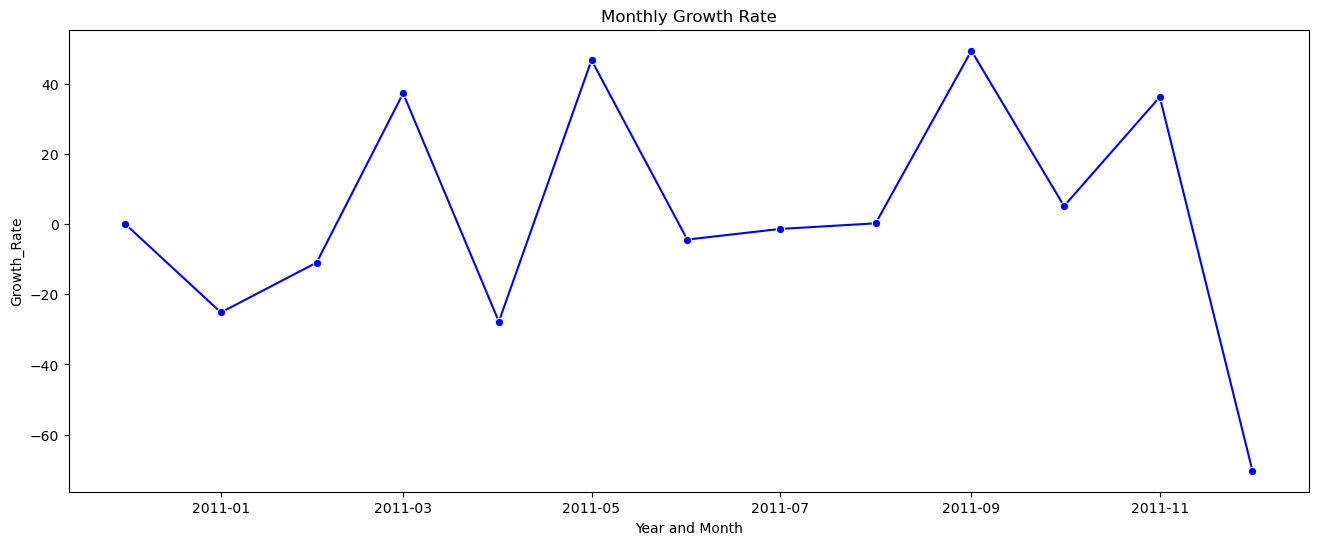

In [24]:
# Monthly growth rate plot
plt.figure(figsize=(16,6))
sns.lineplot(data = rev_by_month,x = 'YearMonth',y = 'Growth_Rate',marker = 'o',color = 'blue')
plt.title('Monthly Growth Rate')
plt.xlabel('Year and Month')
plt.show()

### Realizations :
- The largest __positive__ growth rate occurred in `September` with an increase of approximately __49.34%__.

- The largest __negative__ growth rate occurred in `Dec-2011`, where revenue decreased by about __70.20%__.

- `April` experienced the second-largest __negative__ growth rate, with a __decrease__ of approximately ___27.80%___.

In [25]:
# revenue per country
rev_by_country = df.groupby('Country')['Revenue','Quantity'].sum().reset_index()

In [26]:
rev_by_country.sort_values(by = ['Revenue','Quantity'],ascending = False).head()

,Country,Revenue,Quantity
36,United Kingdom,8167128.184,4263937
24,Netherlands,284661.54,200128
10,EIRE,262993.38,142495
14,Germany,221509.47,117341
13,France,197317.11,110438


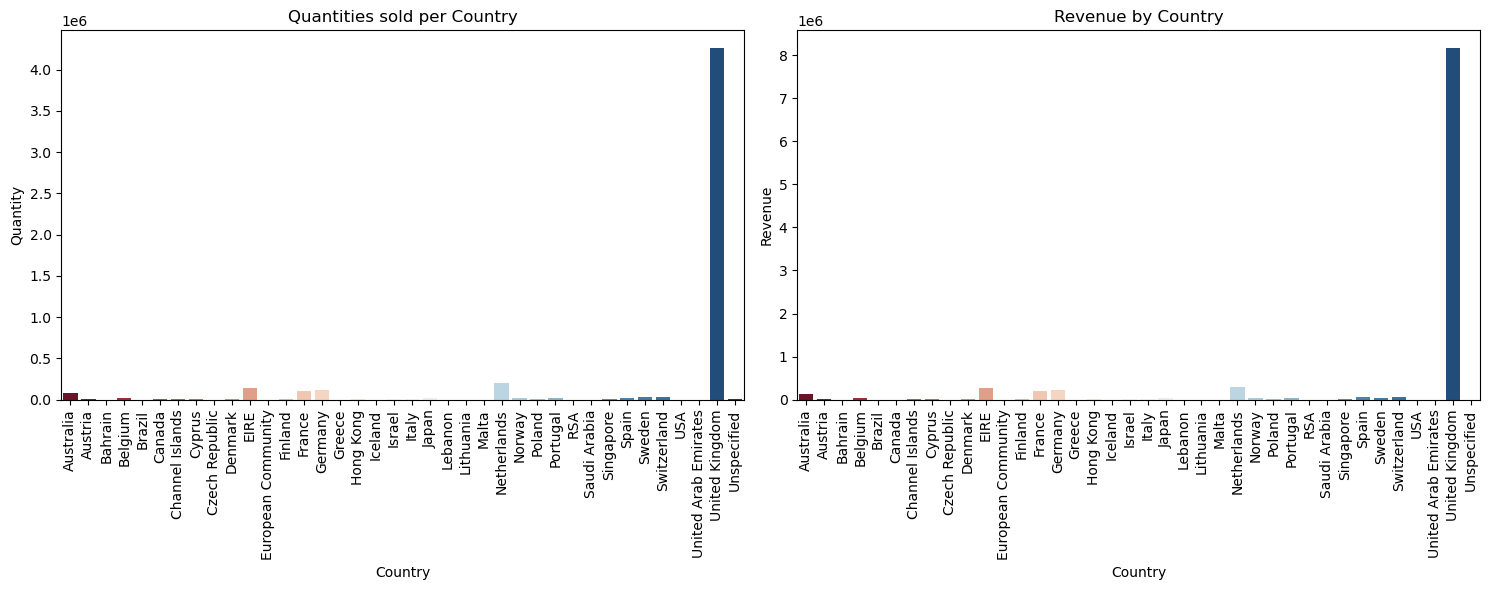

In [27]:
# Revenue and quantities graphs
# Setting up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Quantities sold per Country
sns.barplot(data=rev_by_country, x='Country', y='Quantity', ax=ax1,palette = 'RdBu')
ax1.set_title('Quantities sold per Country')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Second plot: Revenue by Country
sns.barplot(data=rev_by_country, x='Country', y='Revenue', ax=ax2, palette = 'RdBu')
ax2.set_title('Revenue by Country')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Realizations :
- The `United Kingdom` is the **highest revenue-generating** country by a significant margin, with a total revenue of approximately **8.16 million**.

- The `United Kingdom` also leads in terms of **quantity sold**, with approximately **4.26 million items**.

- A **large portion** of the revenue comes from a few key countries like the `United Kingdom`, `Netherlands`, `EIRE`, `France`, `Germany`, and others, while some countries contribute smaller amounts.

- Some countries, such as `Australia`, `Switzerland`, and `Spain`, have substantial revenue, suggesting **potential growth opportunities** or **strong customer bases** in those regions.

- There seems to be a __positive correlation__ between `revenue` and `quantity sold`, which is expected. Countries with ___higher quantities sold___ tend to have ___higher revenue___.

In [28]:
# Calculating customers per country column
rev_by_country['# of customers'] = df.groupby('Country')['CustomerID'].nunique().reset_index()['CustomerID']

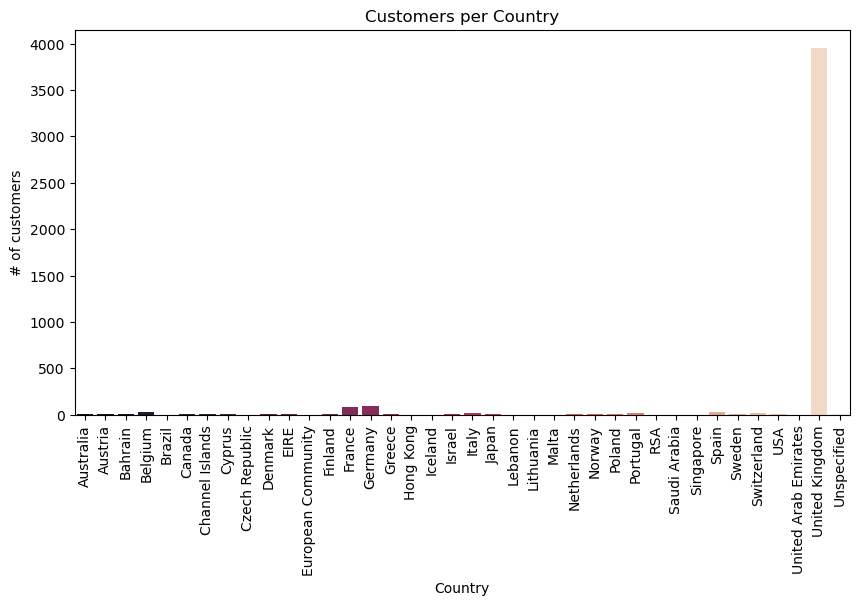

As expected no. of customers are also higher in UK compared to other countries.


In [29]:
# customers per country graph
plt.figure(figsize = (10,5))
sns.barplot(data=rev_by_country, x='Country', y='# of customers', palette = 'rocket')
plt.title('Customers per Country')
plt.xticks(rotation = 90)
plt.show()
print('As expected no. of customers are also higher in UK compared to other countries.')

In [30]:
# Top 10 customers by spending
total_spend_by_each_customer = (cleaned_df.groupby('CustomerID')['Revenue'].sum().reset_index()).sort_values(by = 'Revenue',ascending = False)
top_10_customers_by_spending = total_spend_by_each_customer.head(10).sort_values(by = 'CustomerID')

In [31]:
top_10_customers_by_spending

,CustomerID,Revenue
55,12415,123725.45
1005,13694,62690.54
1345,14156,113214.59
1703,14646,279489.02
1895,14911,132458.73
2192,15311,59284.19
3202,16684,65892.08
3758,17450,187322.17
3801,17511,88125.38
4233,18102,256438.49


THESE OBSEVATIONS ARE WITHOUT THE UNKNOWN CUSTOMERS.

We have a total of 4373 customers and here are our top 10 valuable customers :


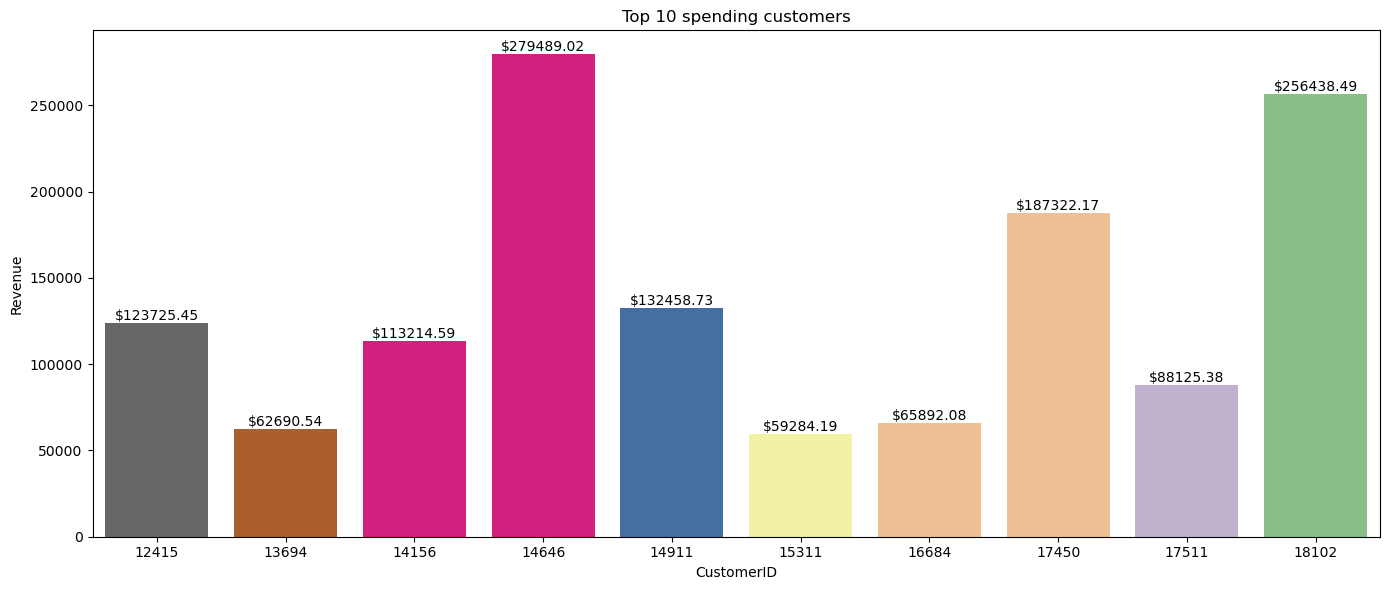

Average revenue per customer is 1893.53
Total Revenue generated by known customers is 8278519.42
Total Revenue Generated by the unknown customers is 1447487.53


In [32]:
# Top 10 customers visualization
print('THESE OBSEVATIONS ARE WITHOUT THE UNKNOWN CUSTOMERS.')
print(f'\nWe have a total of {df["CustomerID"].nunique()} customers and here are our top 10 valuable customers :')

plt.figure(figsize = (14,6))
sns.barplot(data = top_10_customers_by_spending, x = 'CustomerID',y = 'Revenue', palette = 'Accent_r')
plt.title('Top 10 spending customers')

# Adding labels
for index, value in enumerate(top_10_customers_by_spending['Revenue']):
    plt.text(index, value, f'${value:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Avg spending per customer
print(f'Average revenue per customer is {total_spend_by_each_customer["Revenue"].mean():.2f}')
print(f'Total Revenue generated by known customers is {cleaned_df["Revenue"].sum():.2f}')
print(f'Total Revenue Generated by the unknown customers is {null_customers["Revenue"].sum():.2f}')

In [33]:
# Top selling products
products_by_quantity = df.groupby('StockCode')['Quantity','Revenue'].sum().reset_index()
top_10_products = products_by_quantity.sort_values(by = 'Quantity',ascending = False).head(10)
top_10_rev_generating_product = products_by_quantity.sort_values(by = 'Revenue',ascending = False).head(10)

In [34]:
top_10_rev_generating_product[['StockCode','Revenue']]

,StockCode,Revenue
3947,DOT,206245.48
1238,22423,164459.49
2476,47566,98243.88
3570,85123A,97838.45
3559,85099B,92175.79
1872,23084,66661.63
3950,POST,66230.64
934,22086,63715.24
2679,84879,58792.42
2543,79321,53746.66


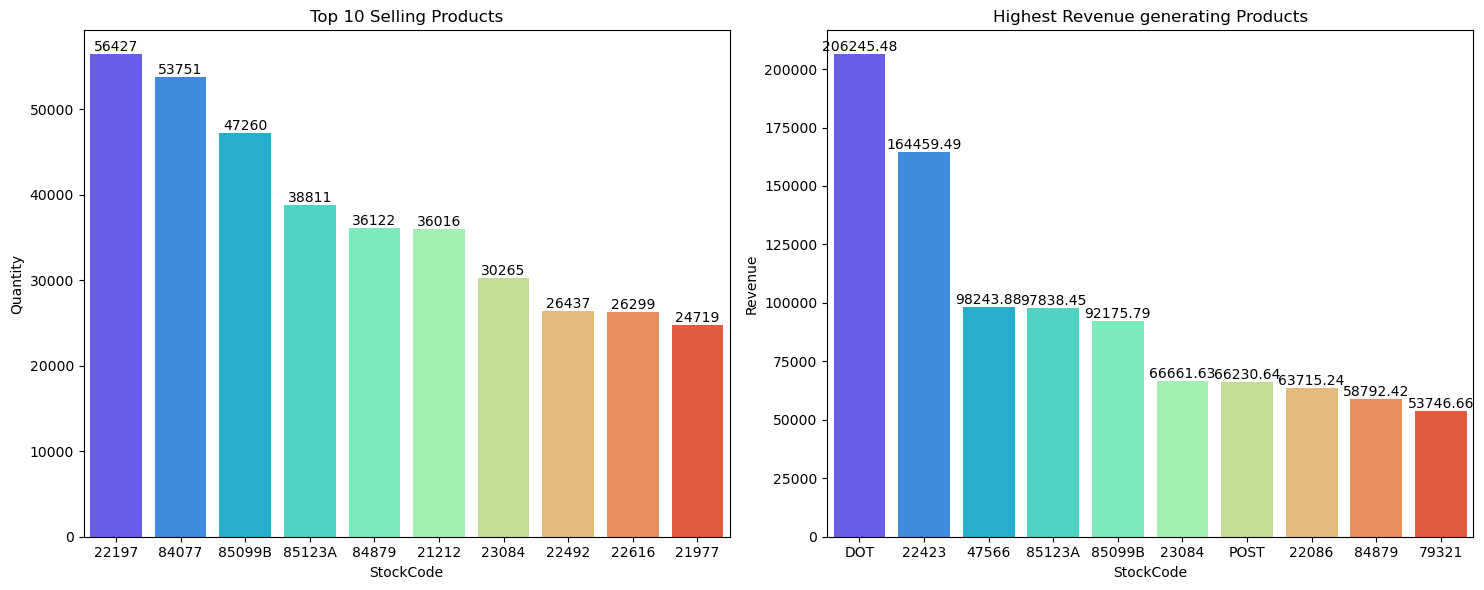

In [35]:
# Top_10_products
# Setting up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Top 10 selling products
sns.barplot(data=top_10_products, x='StockCode', y='Quantity', ax=ax1,palette = 'rainbow')
ax1.set_title('Top 10 Selling Products')
# Adding labels to the second plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Second plot: Highest revenue generating product
sns.barplot(data=top_10_rev_generating_product, x='StockCode', y='Revenue', ax=ax2,  palette = 'rainbow')
ax2.set_title('Highest Revenue generating Products')
# Adding labels to the second plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Realizations: 
__Top Revenue Generating Products:__
- StockCode `DOT` : This product has generated the ___highest revenue___, totaling 206,245.48. It's a significant contributor to the overall revenue.
- StockCode `22423`: This product has generated ___substantial revenue___ as well, amounting to ___164,459.49___. It's the second-highest revenue generator.

__Top Selling Products:__
- StockCode `22197`: This product is the ___top-selling item___, with a total quantity sold of ___56,427 units___. It's the highest in terms of units sold.
- StockCode `84077`: This product is also very popular, with ___53,751 units sold___.

__Observation:__
- The product represented by StockCode `85099B` and `85123A` seems to be the __standout performers__. They are not only very popular among customers (__high quantity sold__) but also __generates substantial revenue__.

In [36]:
# No. of transactions per month
txn_by_month = df.groupby(['YearMonth'])['InvoiceNo'].count().reset_index()

In [37]:
txn_by_month.sort_values(by='InvoiceNo',ascending = False)

,YearMonth,InvoiceNo
11,2011-11-01,83268
10,2011-10-01,59865
9,2011-09-01,49762
0,2010-12-01,41856
7,2011-07-01,39112
5,2011-05-01,36644
6,2011-06-01,36518
3,2011-03-01,36274
8,2011-08-01,34982
1,2011-01-01,34786


Dec-2011 data available is only for 12 days not whole month.


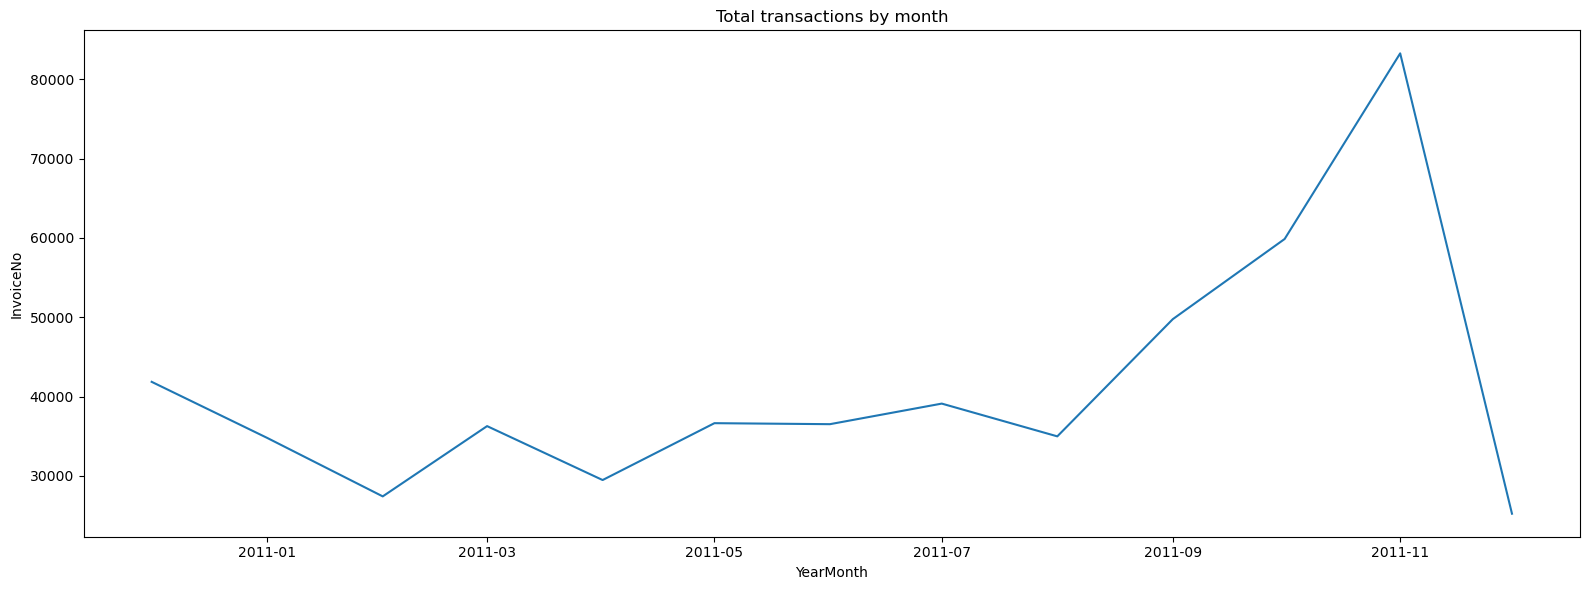

In [38]:
# Visual of number of txns per month
print('Dec-2011 data available is only for 12 days not whole month.')
plt.figure(figsize=(16,6))
sns.lineplot(data = txn_by_month,x = 'YearMonth',y = 'InvoiceNo')
plt.title('Total transactions by month')
plt.tight_layout()
plt.show()

### Realizations:
- The number of transactions varies over month, indicating **potential seasonal trends** or **variations** in business activity.

- In the month of `November` highest number of orders were made. This could be due to factors like **holiday shopping, promotions**, or **other business-specific events**.

- Except for Feb-2011, the number of invoices in each month remains **relatively high** and **consistent**. This suggests that the business maintains a **steady level of activity**.

Mean Transaction Value: 18.17
Median Transaction Value: 9.90
Minimum Transaction Value: -168469.60
Maximum Transaction Value: 168469.60
Standard Deviation of Transaction Values: 381.17


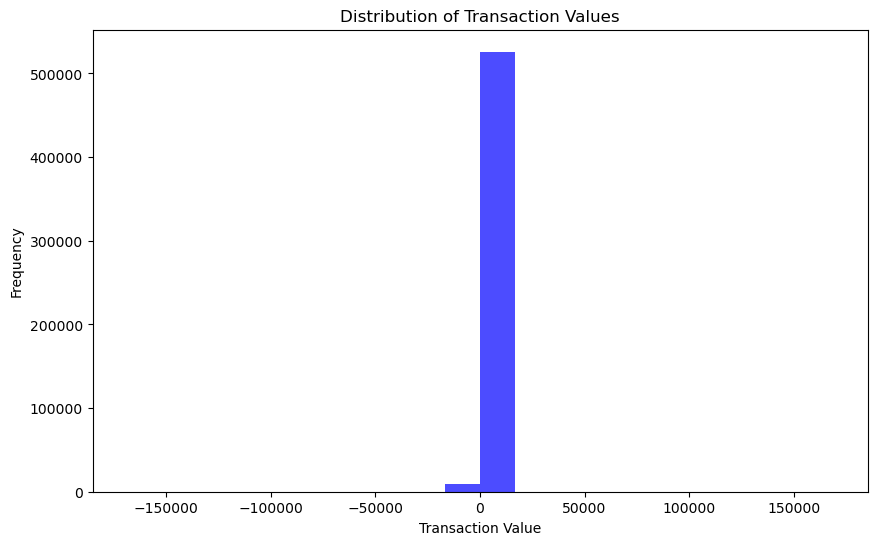

In [39]:
# Distribution of Transaction values
# Calculate summary statistics
mean_value = df['Revenue'].mean()
median_value = df['Revenue'].median()
min_value = df['Revenue'].min()
max_value = df['Revenue'].max()
std_dev = df['Revenue'].std()

# Print the summary statistics
print(f"Mean Transaction Value: {mean_value:.2f}")
print(f"Median Transaction Value: {median_value:.2f}")
print(f"Minimum Transaction Value: {min_value:.2f}")
print(f"Maximum Transaction Value: {max_value:.2f}")
print(f"Standard Deviation of Transaction Values: {std_dev:.2f}")

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Revenue'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()


In [40]:
# Monthly active customers
active_customers = cleaned_df.groupby('YearMonth')['CustomerID'].nunique().reset_index()

In [41]:
active_customers

,YearMonth,CustomerID
0,2010-12-01,948
1,2011-01-01,783
2,2011-02-01,798
3,2011-03-01,1020
4,2011-04-01,899
5,2011-05-01,1079
6,2011-06-01,1051
7,2011-07-01,993
8,2011-08-01,980
9,2011-09-01,1302


THESE OBSERVATIONS ARE WITHOUT THE UNKNOWN CUSTOMERS. | DATA FOR DEC-2011 IS NOT COMPLETE DATA.


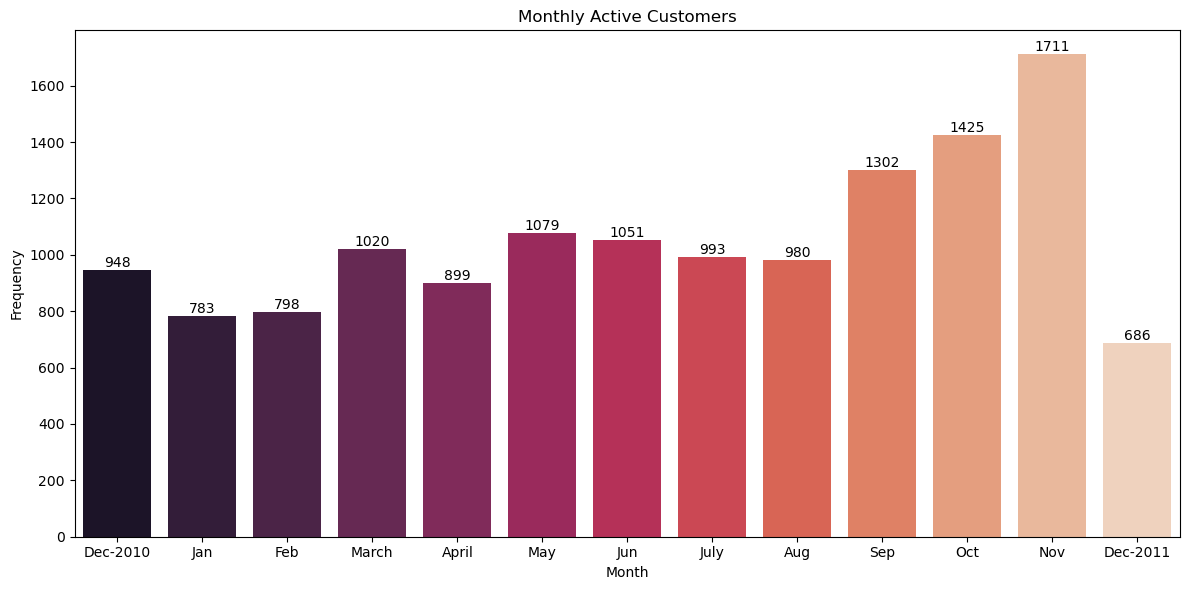

In [42]:
# Monthly active customers visual
print('THESE OBSERVATIONS ARE WITHOUT THE UNKNOWN CUSTOMERS. | DATA FOR DEC-2011 IS NOT COMPLETE DATA.')
plt.figure(figsize = (12,6))
sns.barplot(data = active_customers, x = 'YearMonth', y = 'CustomerID', palette = 'rocket')
plt.title('Monthly Active Customers')

# Custom labels for x-axis
custom_labels = ('Dec-2010','Jan','Feb','March','April','May','Jun','July','Aug','Sep','Oct','Nov','Dec-2011')
plt.xticks(range(len(custom_labels)), custom_labels)
plt.ylabel('Frequency')
plt.xlabel('Month')
for index, value in enumerate(active_customers['CustomerID']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### Realizations:
- There appears to be a general __upward trend__ in the number of active customers as the year progresses. This may indicate **positive business growth and customer acquisition efforts**.

- Peaks in active customers might be attributed to marketing initiatives, promotional events, or seasonal sales campaigns.

- Some months, such as `Jan` and `Feb`, have relatively lower numbers of active customers compared to other months. This may indicate periods of slower business activity.

## Returned or Cancelled Items Analysis:
- How many transactions involve cancelled?
- What is the total value of cancelled items?

In [45]:
# Creating dataframe of only returned items for analysis
returned_items_set = df[df['Revenue'] < 0]
returned_items_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,YearMonth,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom,2010,12,1,2010-12-01,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010,12,1,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010,12,1,2010-12-01,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010,12,1,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010,12,1,2010-12-01,-6.96


In [46]:
# Statistical analysis of returned items
returned_items_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,9253.0,-29.780396,1147.873593,-80995.0,-6.0,-2.0,-1.0,1.0
UnitPrice,9253.0,46.168911,687.538174,-11062.06,1.45,2.95,5.95,38970.0
CustomerID,9253.0,14372.920891,3416.177887,0.0,13267.0,14701.0,16293.0,18282.0
Year,9253.0,2010.922295,0.267721,2010.0,2011.0,2011.0,2011.0,2011.0
Month,9253.0,7.278396,3.515159,1.0,4.0,8.0,10.0,12.0
Day,9253.0,14.900573,8.611822,1.0,7.0,14.0,22.0,31.0
Revenue,9253.0,-99.006144,2050.050595,-168469.6,-17.7,-8.5,-3.7,-0.12


In [47]:
# Calculating no of returned transactions and total value of returned items
num_of_return_txn = returned_items_set.shape[0]
total_value_of_return_items = returned_items_set['Revenue'].sum()*-1

In [48]:
# Printing
print(f"Number of returned transactions: {num_of_return_txn}")
print(f"Total value of returned items : {total_value_of_return_items:.2f}$")

Number of returned transactions: 9253
Total value of returned items : 916103.85$


## Free Items Analysis
- In which countries items were given for free?

- When were these giveaways happened?

In [49]:
# create a dataframe for free items only
free_items = df[df['UnitPrice']==0]
free_items.shape

(1056, 13)

In [50]:
# In which countries items were given for free
free_items['Country'].value_counts()

United Kingdom    1038
EIRE                 4
Netherlands          4
Australia            3
Germany              2
Switzerland          1
Spain                1
RSA                  1
France               1
Norway               1
Name: Country, dtype: Int64

`United Kingdom` is the location where way much more giveaways happened than other countries.

In [51]:
giveaways_count = free_items['YearMonth'].value_counts().sort_index()

In [52]:
temp = free_items['YearMonth'].value_counts().sort_index().reset_index()
temp.rename(columns = {'index' : 'Date','YearMonth':'No. of giveaways'})

,Date,No. of giveaways
0,2010-12-01,146
1,2011-01-01,26
2,2011-02-01,62
3,2011-03-01,81
4,2011-04-01,35
5,2011-05-01,106
6,2011-06-01,93
7,2011-07-01,33
8,2011-08-01,49
9,2011-09-01,61


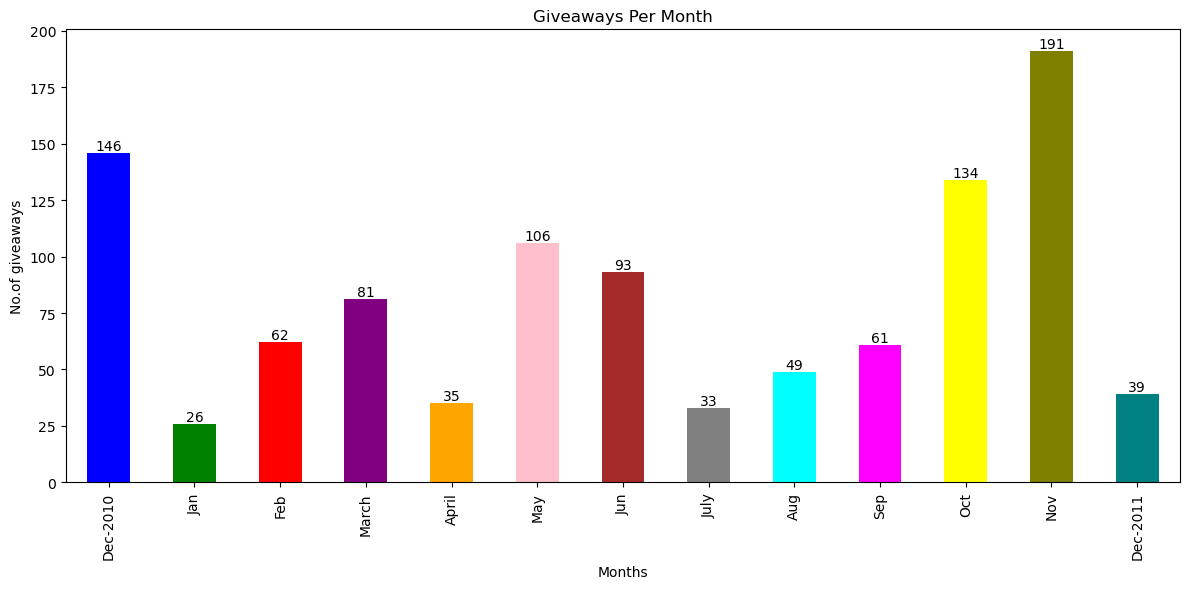

In [53]:
# Giveaways per month
plt.figure(figsize=(12,6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow', 'olive', 'teal']
giveaways_count.plot(kind = 'bar',color=colors)

# Add labels on the bars
for i, count in enumerate(giveaways_count):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
    
custom_labels = ('Dec-2010','Jan','Feb','March','April','May','Jun','July','Aug','Sep','Oct','Nov','Dec-2011')
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Giveaways Per Month')
plt.xlabel('Months')
plt.ylabel('No.of giveaways')
plt.tight_layout()
plt.show()

## Realization:
- `Monthly Variation`: The number of giveaways varies each month. For instance, there was a significant increase in giveaways in November 2011 compared to previous months.

- `Seasonal Trends`: Some months (like November and December) tend to have higher numbers of giveaways, which could be due to holiday seasons, special promotions, or other factors.

- `Low Activity Periods`: Months like January, February, March, July, and August have relatively lower numbers of giveaways, which might be indicative of lower promotional activities during those periods.

- `Potential for Improvement`: Depending on the business context, there might be opportunities to increase or decrease giveaways in specific months to align with marketing goals.

In [54]:
# For further analysis on customers
customer_activity = pd.crosstab(cleaned_df['CustomerID'],cleaned_df['YearMonth']).reset_index()

In [55]:
month_names = ['Dec 2010', 'Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'May 2011',
               'Jun 2011', 'Jul 2011', 'Aug 2011', 'Sep 2011', 'Oct 2011', 'Nov 2011', 'Dec 2011']

# Rename the columns
customer_activity.columns = ['CustomerID'] + month_names

In [56]:
print("Customer's activity every month :")
customer_activity

Customer's activity every month :


,CustomerID,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011
0,12346,0,2,0,0,0,0,0,0,0,0,0,0,0
1,12347,31,29,0,0,24,0,18,0,22,0,47,0,11
2,12348,17,6,0,0,5,0,0,0,0,3,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,0,0,73,0
4,12350,0,0,17,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,0,0,0,10,0,0,0,0,0,0,0,0,0
4368,18281,0,0,0,0,0,0,7,0,0,0,0,0,0
4369,18282,0,0,0,0,0,0,0,0,8,0,0,0,5
4370,18283,0,101,29,0,55,37,100,55,0,47,38,209,50


# Overall Conclusions:
1. ___Revenue Trends___:

- The highest revenue was recorded in November 2011, reaching 1,456,145.80 dollars, while the lowest was in February 2011, at $497,026.41.
- There was a significant drop in revenue from December 2010 to January 2011, indicating a seasonal trend.

2. ___Monthly Growth Rate___:

- The business experienced a sharp decline in revenue in December 2011, with a growth rate of -70.28%. This indicates a substantial drop in sales during this period.

3. ___Top Countries by Revenue and Quantity___:

- The United Kingdom leads in both revenue and quantity sold, with over $8.16 million in revenue and approximately 4.26 million items sold.
- Netherlands and EIRE also show strong performance in terms of revenue and quantity.

4. ___Customer Analysis___:

- The United Kingdom has the highest number of customers (3,951), followed by Germany (95) and France (88).
- Customer 12415 in the United Kingdom is the highest spender, generating revenue of $123,725.45.

5. ___Product Analysis___:

- The most sold product is '22197' with a quantity of 56,427.
- The highest revenue-generating product is 'DOT' with revenue of $206,245.48.

6. ___Transaction Analysis___:

- November 2011 had the highest number of transactions (83,268), followed by October 2011 (59,865).
- February 2011 had the lowest number of transactions (27,414).

7. ___Customer Retention___:

- The number of active customers per month varied, indicating fluctuations in customer engagement over time.

8. ___Returns and Giveaways___:

- There were 3,838 returned transactions, resulting in a total value of $916,103.85. This suggests the need to analyze reasons for returns and take appropriate actions.

- The United Kingdom is the primary country for free giveaways, with 1,038 instances.

Overall, the data highlights the importance of understanding customer behavior, optimizing product offerings, and managing returns effectively to drive revenue growth and customer satisfaction. Additionally, monitoring trends in different countries can help tailor marketing strategies for specific regions.

# Recommendations:
1. ___Seasonal Trends and Inventory Management___:

- As there seems to be seasonal trends in revenue we should ensure that inventory levels are well aligned with the expected demand during these periods.

2. ___Customer Engagement and Retention___:

- We can include targeted marketing campaigns, loyalty programs, and personalized offers to encourage repeat purchases.

3. ___Product Performance___:

- Evaluate the performance of products based on quantity sold and revenue generated. We can consider promoting best-selling products or adjusting the marketing strategy for underperforming items.

4. ___Customer Segmentation___:

- Segment customers based on spending behavior, geography, and other relevant factors. This allows for more tailored marketing efforts and customer communication.

5. ___Returns Analysis___:

- We should investigate the reasons for returns and take steps to address common issues. This may involve improving product descriptions, providing better product images, or enhancing quality control processes.

6. ___International Expansion___:

- Given the strong performance in countries like the Netherlands, EIRE, and Germany, we should consider further expansion or targeted marketing efforts in these regions.

7. ___Optimization of Giveaways___:

- Monitor the effectiveness of giveaways and consider adjusting the strategy based on the ROI of these initiatives. Ensure that giveaways align with the preferences of the target audience.

By implementing these recommendations, the Online Retail can enhance its operations, improve customer satisfaction, and drive sustainable revenue growth. Regular monitoring and analysis of key metrics will be crucial to track the impact of these strategies over time.

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:purple;border:20px;color:white'>The End<h2>